In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df_lines = pd.read_csv("TheOfficeLinesPerCharacter.csv")
df_rating = pd.read_csv("TheOfficeIMDBPerEpisode.csv")

#Set up my master table
df_master = pd.DataFrame(columns = ["season", "episode", "rating"])
characters = df_lines.speaker.value_counts().reset_index(name="count").query("count > 100")["index"]

#Set up season, episode, and rating
episode = 1
season = 1
for i in range(len(df_rating.index)):
    if(season != df_rating.iloc[i]['Season']):
        episode = 1
        season += 1 
    df_master = df_master.append({'season': season, 'episode': episode, 'rating':df_rating.iloc[i]['Rating']}, ignore_index=True)
    episode += 1
      
#Add characters columns
for character in characters:
    df_master[str(character)] = 0
    
#Add lines spoken count for each character
for j in range(len(df_lines.index)):
    speaker = df_lines.iloc[j]['speaker']
    if speaker in df_master.columns:
        season = df_lines.iloc[j]['season']
        episode = df_lines.iloc[j]['episode']
        index = df_master.loc[df_master['season']==season].loc[df_master['episode']==episode].index.values.astype(int)[0]
        df_master.at[index,speaker] += 1
    
#Clean up David's data
David_Wallace = df_master['David'] + df_master['David Wallace']
df_master['David'] = David_Wallace
df_master = df_master.drop(columns=['David Wallace'])


df_master.head(5)



,season,episode,rating,Michael,Dwight,Jim,Pam,Andy,Kevin,Angela,...,Gabe,Robert,David,Karen,Clark,Roy,Charles,Pete,Jo,Deangelo
0,1.0,1.0,7.5,97,35,37,46,0,2,5,...,0,0,0,0,0,5,0,0,0,0
1,1.0,2.0,8.3,103,40,35,26,0,8,4,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.0,7.8,69,88,57,44,0,6,5,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,8.1,111,74,63,37,0,3,9,...,0,0,0,0,0,3,0,0,0,0
4,1.0,5.0,8.4,134,45,27,17,0,4,6,...,0,0,0,0,0,13,0,0,0,0


In [92]:
df_condensed = pd.DataFrame(columns = ["character", "total lines", "avg lines per appearance"])

total_line = df_master.sum(axis=0)
for k in range(3, df_master.shape[1]):
    character = df_master.columns[k]
    total_appearence = len(df_master[character].loc[df_master[character] != 0])
    
    row = {"character" : character, "total lines" : int(total_line[k]), "avg lines per appearance" : int(total_line[k]/total_appearence)}
    df_condensed = df_condensed.append(row, ignore_index=True)
    
df_condensed

,character,total lines,avg lines per appearance
0,Michael,12137,88
1,Dwight,7529,40
2,Jim,6814,36
3,Pam,5375,29
4,Andy,3968,27
5,Kevin,1708,9
6,Angela,1695,9
7,Oscar,1490,8
8,Erin,1469,14
9,Ryan,1379,9


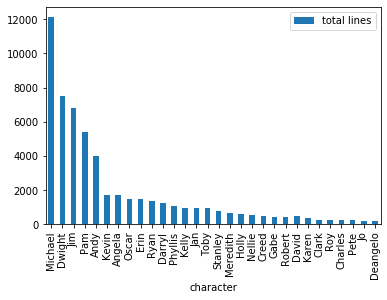

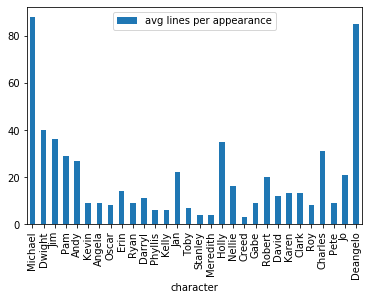

In [93]:
df_condensed.plot(x ='character', y='total lines', kind = 'bar')
plt.show()

df_condensed.plot(x ='character', y='avg lines per appearance', kind = 'bar')
plt.show()